# Imports & Setup

In [1]:
# this is my own personal agent framework: https://github.com/sinanuozdemir/squad-goals
!python3 -m pip install -q --upgrade --force-reinstall --ignore-installed git+https://github.com/sinanuozdemir/squad-goals.git

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.35.22 requires urllib3<1.27,>=1.25.4; python_version < "3.10", but you have urllib3 2.3.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [7]:
os.environ['DEEPSEEK_API_KEY'] = 'DEEPSEEK_API_KEY'

os.environ['SERP_API_KEY'] = 'SERP_API_KEY'
os.environ['GEMINI_API_KEY'] = 'GEMINI_API_KEY'
os.environ['OPENAI_API_KEY'] = 'OPENAI_API_KEY'
os.environ['FIRECRAWL_API_KEY'] = 'FIRECRAWL_API_KEY'
os.environ['ANTHROPIC_API_KEY'] = 'ANTHROPIC_API_KEY'

In [8]:
from squad_goals import Agent, Task
from squad_goals.tools import SerpTool, APITool, FirecrawlSearchTool, GoogleSpreadsheetTool, PythonREPLTool
from squad_goals.llms import OllamaLLM, DeepSeekLLM
import os

In [29]:
ollama_llm = OllamaLLM(model_name='deepseek-r1:7b', static_generation_kwargs={'temperature': 0.6})
ollama_llm.generate([{'role': 'user', 'content': 'What is the capital of Turkey?'}], stop=['nka'])

'<think>\n\n</think>\n\nThe capital of Turkey is A'

In [25]:
deepseek_llm = DeepSeekLLM(model_name='deepseek-chat')
deepseek_llm.generate([{'role': 'user', 'content': 'What is the capital of Turkey?'}], stop=['nka'])

'The capital of Turkey is A'

In [12]:
# deepseek_llm = DeepSeekLLM(model_name='deepseek-reasoner')
# deepseek_llm.generate([{'role': 'user', 'content': 'What is the capital of Turkey?'}], stop=['nka'], temperature=0.5)

In [31]:
a = Agent(
    tools=[SerpTool()],
    llm=ollama_llm,
    verbose=True,
    debug=True,
    max_loops=1,
    tool_eval_mode=True  # will not run tools, just selects them
)

task = Task(
    name='Who won the latest Super Bowl?',
    goal='Who won the latest Super Bowl?',
    output_format='text'
)
a.run(task)

generated <think>
Alright, so I need to figure out who won the latest Super Bowl. Let me start by checking when the last Super Bowl was held because that's the most recent one available.

I know that the Super Bowl is an annual event in the winter, usually in early February. The last one I remember was a big game with a lot of teams involved. 

Wait, wasn't the 2023 Super Bowl last? Let me think about the dates. It's currently January 2025, so the latest would be 2023.

In 2023, the San Francisco 49ers played against the Los Angeles Rams. I believe the Rams won that game because they had some really strong players and a great coach like Todd Gurley.

To make sure I'm not wrong, maybe I should double-check the date of the last Super Bowl. Yes, the 2023 Super Bowl was held on February 12, 2023, in LA. The Rams won with a score of 24-18 against the 49ers.

So, putting it all together, the latest Super Bowl winner is the Los Angeles Rams.
</think>

The latest Super Bowl, which took place o

Task(Who won the latest Super Bowl?.., Goal: Who won the latest Super Bowl?.., text, Completed: True). Succeeded: True

# Run Our Test

In [32]:
google_spreadsheet_tool = APITool(
    api_url='',
    api_key='',
    name = "Google Spreadsheet Tool",
    description = "This tool appends data to a Google Spreadsheet.",    
)
FakeCryptoAPITool = APITool(
    api_url='',
    api_key='',
    name='Crypto and NFT Tool',
    description='Use this tool to get current cryptocurrency prices and NFT prices around the world and for my wallet.'
)

tool_selection_test_data = [
    ('Check the status of my NFT listings', FakeCryptoAPITool.name),
    ('What is the price of ethereum right now?', FakeCryptoAPITool.name),
    ('What is the price of bitcoin right now?', FakeCryptoAPITool.name),
    ('Check the floor price of the world of women nft', FakeCryptoAPITool.name),

    ('Add a new row and just write "To do" in it', google_spreadsheet_tool.name),
    ('Add this data to the spreadsheet: "1, 2, 3"', google_spreadsheet_tool.name),
    ('Add: "Sinan, LoopGenius" to the spreadsheet', google_spreadsheet_tool.name),
    
    ('Go to https://loopgenius.com and tell me about it', FirecrawlSearchTool().name),
    ('Visit https://github.com/trending and list top repositories', FirecrawlSearchTool().name),
    ('Scrape the main headlines from https://news.ycombinator.com', FirecrawlSearchTool().name),
    ('Go to https://en.wikipedia.org/wiki/Python_(programming_language) and summarize the introduction', FirecrawlSearchTool().name),
    ('Check the documentation at https://pytorch.org and tell me the latest version name', FirecrawlSearchTool().name),
    ('Visit https://openai.com and summarize the homepage', FirecrawlSearchTool().name),
    ('What is the headline on https://bbc.com/news', FirecrawlSearchTool().name),
    
    ('What are the current gas prices in Chicago?', SerpTool().name),
    ('What is the weather in San Francisco?', SerpTool().name),
    ('Find the intro.co link for Sinan Ozdemir', SerpTool().name),
    ('What is the release date of the next Marvel movie?', SerpTool().name),
    ('Who won the latest Super Bowl?', SerpTool().name),
    ('What are the top restaurants in New York City?', SerpTool().name),
    ('Get the latest stock price for Apple (AAPL)', SerpTool().name),
    ('List the top 5 popular programming languages in 2024', SerpTool().name),
    ('Look up the conversion from 98 degrees Fahrenheit to Celsius on the web', SerpTool().name),
    
    ('Convert 98 degrees Fahrenheit to Celsius using Python', PythonREPLTool().name),
    ('Write a function that yields the nth fibonacci number and use it to find the 100th fibonacci number', PythonREPLTool().name),
    ('Calculate the factorial of 10 using Python', PythonREPLTool().name),
    ('Calculate 15% of 34543.453', PythonREPLTool().name),
    ('Convert 42 kilometers to miles using a function in Python', PythonREPLTool().name),
    ('Generate a random number between 1 and 1000', PythonREPLTool().name),
    
]

llms_to_test = [
    (OllamaLLM(model_name='deepseek-r1:7b'), 'DeepSeek-R1-Distill-Qwen-7B'),
    # (DeepSeekLLM(model_name='deepseek-chat'), 'DeepSeek Chat')
]

tools_to_pick_from = [FirecrawlSearchTool(), SerpTool(), PythonREPLTool(), FakeCryptoAPITool, google_spreadsheet_tool]

n = 10

In [52]:
len(tools_to_pick_from), len(tool_selection_test_data)

(5, 29)

In [34]:
def run_single_loop(goal, llm, _tools):
    a = Agent(
        tools=_tools,
        llm=llm,
        verbose=False,
        debug=False,
        max_loops=1,
        tool_eval_mode=True  # will not run tools, just selects them
    )
    
    task = Task(
        name=goal,
        goal=goal,
        output_format='text'
    )
    try:
        a.run(task)
    except Exception as e:
        print(e)
        return 'FAILURE', a.tools_selected
    return task.output, a.tools_selected

In [ ]:
from random import shuffle
from tqdm import tqdm
from copy import deepcopy

result_data = []


In [77]:
llms_to_test = [
    (OllamaLLM(model_name='deepseek-r1:7b'), 'DeepSeek-R1-Distill-Qwen-7B'),
    (OllamaLLM(model_name='deepseek-r1:1.5b'), 'DeepSeek-R1-Distill-Qwen-1.5B'),
    
    (DeepSeekLLM(model_name='deepseek-chat'), 'DeepSeek Chat')  # still need to do
]

In [79]:
# Outer progress bar for testing LLMs
with tqdm(llms_to_test, desc='Testing LLMs', position=0) as llm_bar:
    for llm, llm_name in llm_bar:
        # Update description for the LLM being tested
        llm_bar.set_description(f'Testing LLM: {llm_name}')

        # Progress bar for tool selection test data
        with tqdm(tool_selection_test_data, desc='Test Data Progress', position=1, leave=False) as data_bar:
            for goal, correct_tool_name in data_bar:
                # Inner progress bar for repeated tests
               for _ in range(n):
                    shuffle(tools_to_pick_from)
                    tool_names = [tool.name for tool in tools_to_pick_from]

                    output, tools_selected = run_single_loop(goal, llm, deepcopy(tools_to_pick_from))
                    if len(tools_selected) < 1:
                        print('Error')
                        continue
                    chosen_tool_name = tools_selected[0]
                    chosen_tool_index = next(
                        (i for i, tool_name in enumerate(tool_names) if tool_name == chosen_tool_name), None
                    )
                    chosen_tool_name = next(
                        (tool_name for i, tool_name in enumerate(tool_names) if tool_name == chosen_tool_name), None
                    )
                    
                    try:
                        correct_tool_index = next(
                            (i for i, tool_name in enumerate(tool_names) if tool_name == correct_tool_name), None
                        )
                    except Exception as e:
                        print(f'fail correct_tool_index: {e}. correct_tool_name: {correct_tool_name}')
                    
                    result_data.append(
                        dict(
                            correct_tool_index=correct_tool_index,
                            chosen_tool_name=chosen_tool_name,
                            chosen_tool_index=chosen_tool_index,
                            tool_chosen_correctly=chosen_tool_index == correct_tool_index,
                            llm_name=llm_name,
                            correct_tool_name=correct_tool_name,
                            output=output
                        )
                    )

Test Data Progress:   7%|████▉                                                                  | 2/29 [07:37<1:40:50, 224.10s/it]

Final answer detected: 69438
Final answer detected: $69,874



Test Data Progress:  24%|█████████████████▏                                                     | 7/29 [30:43<1:44:13, 284.25s/it]

Final answer detected: LoopGenius is a leading platform providing advanced solutions in artificial intelligence and machine learning, offering tools for data analysis, predictive modeling, and automation. Their platform is widely used across various industries to enhance efficiency and decision-making processes.
Final answer detected: No suitable tools are available to provide information about loopgenius.com



Test Data Progress:  28%|███████████████████▌                                                   | 8/29 [34:21<1:32:04, 263.09s/it]

Final answer detected: Here are the top trending GitHub repositories:
[Link1], [Link2], ...



Test Data Progress:  31%|██████████████████████                                                 | 9/29 [38:45<1:27:43, 263.16s/it]

Final answer detected: List of top repositories from GitHub trends including their details
Final answer detected: the result of the Firecrawl web search tool run with the URL https://news.ycombinator.com and what_to_return set to 'text'



Test Data Progress:  34%|████████████████████████▏                                             | 10/29 [42:32<1:19:51, 252.18s/it]

Final answer detected: The introduction of Python's Wikipedia page highlights its creation by Guido van Rossum in 1989 with a design focus on readability and simplicity. It supports multiple programming paradigms and is widely used across data analysis, web development, scientific computing, and AI due to its extensive libraries. Open-source and free, it offers a distinct flavor compared to conventional languages.
Final answer detected: Python is an interpreted high-level programming language known for its clean and intuitive syntax.



Test Data Progress:  38%|██████████████████████████▌                                           | 11/29 [46:39<1:15:08, 250.47s/it]

Final answer detected: Python is an open-source high-level programming language created in 1989 by Guido van Rossum. It features dynamic typing and an interpreted execution model, making it suitable for various applications such as web development, data analysis, and game creation. The language's syntax is designed to be easy to read and write, with a comprehensive interpreter and module system for extending functionality.



Test Data Progress:  45%|███████████████████████████████▍                                      | 13/29 [53:39<1:01:35, 230.99s/it]

Final answer detected: I'm sorry, but I don't have access to real-time information. Please use the Firecrawl web search tool to fetch the latest news.



Test Data Progress:  48%|██████████████████████████████████▊                                     | 14/29 [56:53<54:58, 219.89s/it]

Final answer detected: Boris Johnson steps down as Prime Minister after reshuffle



Test Data Progress:  55%|██████████████████████████████████████▌                               | 16/29 [1:05:39<51:51, 239.34s/it]

Final answer detected: https://intro.co/@sinan-ozdemir
Final answer detected: https://intro.co/sinan-ozdemir



Test Data Progress:  59%|█████████████████████████████████████████                             | 17/29 [1:09:18<46:37, 233.11s/it]

Final answer detected: The next Marvel movie, 'Spider-Man: Web Slingers,' is set to release on October 6, 2023.
Final answer detected: the next Marvel movie will be released in early 2025
Final answer detected: The next Marvel movie is expected to be released on March 1, 2025.



Test Data Progress:  62%|███████████████████████████████████████████▍                          | 18/29 [1:13:03<42:19, 230.88s/it]

Final answer detected: The next Marvel movie is scheduled to be released in Summer 2023.
Final answer detected: The Kansas City Chiefs won the latest Super Bowl, Super Bowl LVIII in 2023.
Final answer detected: The Kansas City Chiefs won the latest Super Bowl.
Final answer detected: The Kansas City Chiefs won the latest Super Bowl, Super Bowl LVIII, in 2024.
Final answer detected: The San Francisco 49ers won the latest Super Bowl (Super Bowl LVIII).
Final answer detected: The Kansas City Chiefs won the latest Super Bowl in 2022.



Test Data Progress:  66%|█████████████████████████████████████████████▊                        | 19/29 [1:17:02<38:53, 233.35s/it]

Final answer detected: Los Angeles Rams



Test Data Progress:  72%|██████████████████████████████████████████████████▋                   | 21/29 [1:25:41<33:10, 248.76s/it]

Final answer detected: ['Python', 'Java', 'C++', 'JavaScript', 'SQL']
Final answer detected: The top 5 popular programming languages in 2023 are Python, JavaScript, Java, TypeScript, and Go. For the most up-to-date information as of 2024, please refer to a tech analytics source.



Test Data Progress:  76%|█████████████████████████████████████████████████████                 | 22/29 [1:30:16<29:56, 256.70s/it]

Final answer detected: The conversion of 98°F to Celsius is approximately 36.1°C.



Test Data Progress:  79%|███████████████████████████████████████████████████████▌              | 23/29 [1:33:34<23:54, 239.15s/it]

Final answer detected: the final answer to return to the user
Final answer detected: 36.67



Test Data Progress:  86%|████████████████████████████████████████████████████████████▎         | 25/29 [2:03:25<42:12, 633.17s/it]

Final answer detected: 3628800



Test Data Progress:  90%|██████████████████████████████████████████████████████████████▊       | 26/29 [2:07:09<25:31, 510.56s/it]

Final answer detected: 3628800
Final answer detected: 5181.51795
Final answer detected: The calculation shows that 15% of 34543.453 is 5181.51795.
Final answer detected: 5,181.51795



Test Data Progress:  93%|█████████████████████████████████████████████████████████████████▏    | 27/29 [2:12:22<15:02, 451.17s/it]

Final answer detected: 26.0955
Final answer detected: 26.1
Final answer detected: The conversion of 42 kilometers to miles is approximately 26.0986 miles.



Test Data Progress:  97%|███████████████████████████████████████████████████████████████████▌  | 28/29 [2:16:28<06:29, 389.69s/it]

Final answer detected: random_number
Final answer detected: the random number generated by the Python REPL
Final answer detected: The random number between 1 and 1000 is generated using Python code.



Test Data Progress:   0%|                                                                                  | 0/29 [00:00<?, ?it/s]

Final answer detected: the final answer to return to the user
Final answer detected: The final answer to your task is that your current NFTs are listed below...
Final answer detected: The following is a list of all NFTs in your wallet with their titles, prices, and listing dates. Each NFT has an ID field which you can use to identify it.
Final answer detected: List NFTs
Final answer detected: The status of all NFT listings has been analyzed and summarized.



Test Data Progress:   3%|██▌                                                                      | 1/29 [01:53<53:03, 113.69s/it]

Final answer detected: $450
Final answer detected: $6,500.24



Test Data Progress:   7%|█████                                                                    | 2/29 [03:25<45:23, 100.86s/it]

Final answer detected: the price of bitcoin right now
Final answer detected: the current price of bitcoin right now
Final answer detected: the current Bitcoin price
Final answer detected: $51,230
Final answer detected: your answer



Test Data Progress:  10%|███████▌                                                                 | 3/29 [05:12<44:59, 103.81s/it]

Final answer detected: the final answer to return to the user
Final answer detected: Check the floor price of the world's largest NFT using a Google Spreadsheet tool with data from the SerpAPI tool for formatting.



Test Data Progress:  17%|████████████▌                                                            | 5/29 [08:50<42:25, 106.06s/it]

Final answer detected: the final answer to return to the user



Test Data Progress:  21%|███████████████▎                                                          | 6/29 [10:18<38:13, 99.74s/it]

Final answer detected: 1 2 3
Final answer detected: the result
Final answer detected: The task was done successfully.



Test Data Progress:  24%|█████████████████▊                                                        | 7/29 [11:39<34:19, 93.61s/it]

Final answer detected: The loopgenius.com platform offers features for web scraping, crypto analysis, Python development environments, Google Sheet appends, and AI tools. It provides comprehensive resources for various tech interests.
Final answer detected: We will gather information about LoopGenius.com by crawling its web pages using tools like Firecrawl for web scraping and SerpAPI for parsing HTML content. We'll extract menus, services, and features from each section of the website page.
Final answer detected: your answer



Test Data Progress:  28%|████████████████████▍                                                     | 8/29 [13:07<32:13, 92.07s/it]

Final answer detected: Report of top GitHub repositories



Test Data Progress:  31%|██████████████████████▉                                                   | 9/29 [14:54<32:14, 96.70s/it]

Final answer detected: scraped_text



Test Data Progress:  34%|████████████████████████▊                                               | 10/29 [17:25<35:56, 113.52s/it]

Final answer detected: The Python programming language is a high-level, general-purpose dynamic programming language that runs on various platforms. It was created by Guido van der Meersche and Tom Körner in 1990 and has been continuously developed since then. Python is known for its simplicity of syntax, which allows developers to write code quickly and avoid certain complexities associated with other programming languages like C or Java.



Test Data Progress:  38%|███████████████████████████▎                                            | 11/29 [19:04<32:39, 108.84s/it]

Final answer detected: PyTorch 1.x



Test Data Progress:  45%|████████████████████████████████▋                                        | 13/29 [21:38<25:04, 94.05s/it]

Final answer detected: The headline on BBC News for January 27, 2025 is: 'Boris Johnson to lead U.K. response to Brexit.'



Test Data Progress:  48%|███████████████████████████████████▏                                     | 14/29 [23:05<23:00, 92.04s/it]

Final answer detected: The current gas prices in Chicago are based on [price range] found from multiple sources, updated regularly.
Final answer detected: The current gas prices in Chicago are [insert specific values here]
Final answer detected: The current gas prices in Chicago as of today are
Final answer detected: The current gas prices in Chicago range from approximately $4.50 to $4.75 per gallon.
Final answer detected: The current gas prices in Chicago can be accessed by filling out a spreadsheet with known cities and their respective prices from an online source.



Test Data Progress:  52%|█████████████████████████████████████▊                                   | 15/29 [24:45<21:58, 94.19s/it]

Final answer detected: the current weather...



Test Data Progress:  55%|████████████████████████████████████████▎                                | 16/29 [26:12<19:56, 92.08s/it]

Final answer detected: the final answer to return to the user



Test Data Progress:  59%|██████████████████████████████████████████▊                              | 17/29 [27:56<19:07, 95.66s/it]

Final answer detected: {'title': '[Insert Title of Next Marvel Movie]', 'director': "[Insert Director's Name]", 'release_date': '[Insert Release Date]'}



Test Data Progress:  66%|███████████████████████████████████████████████▊                         | 19/29 [30:26<14:11, 85.17s/it]

Final answer detected: Your findings about the top NYC restaurants



Test Data Progress:  69%|██████████████████████████████████████████████████▎                      | 20/29 [32:11<13:40, 91.20s/it]

Final answer detected: the latest stock price for Apple
Final answer detected: the latest stock price of Apple (AAPL)
Final answer detected: The final answer is {'apple_stock_price': 1050.25}



Test Data Progress:  72%|████████████████████████████████████████████████████▊                    | 21/29 [34:06<13:06, 98.33s/it]

Final answer detected: The top five popular programming languages for 2024 include Python, Java, C++, Rust, and JavaScript.



Test Data Progress:  76%|███████████████████████████████████████████████████████▍                 | 22/29 [35:12<10:20, 88.59s/it]

Final answer detected: 47.22...



Test Data Progress:  79%|█████████████████████████████████████████████████████████▉               | 23/29 [36:42<08:53, 88.91s/it]

Final answer detected: 30.556...
Final answer detected: The final answer to the conversion of 98 degrees Fahrenheit to Celsius is approximately 36.7 degrees Celsius.



Test Data Progress:  83%|████████████████████████████████████████████████████████████▍            | 24/29 [38:10<07:23, 88.76s/it]

Final answer detected: 30.55...



Test Data Progress:  86%|██████████████████████████████████████████████████████████████          | 25/29 [42:36<09:27, 141.79s/it]

Final answer detected: 3628800



Test Data Progress:  90%|████████████████████████████████████████████████████████████████▌       | 26/29 [44:04<06:17, 125.82s/it]

Final answer detected: the final answer to return to the user
Final answer detected: The result of 15% of 34543.453 is 5181.51795



Test Data Progress:  93%|███████████████████████████████████████████████████████████████████     | 27/29 [58:09<11:22, 341.39s/it]

Final answer detected: 26.098
Final answer detected: 26.09 miles
Final answer detected: 26.098 miles



Test Data Progress:  97%|█████████████████████████████████████████████████████████████████████▌  | 28/29 [59:52<04:29, 269.83s/it]

Final answer detected: random number between 1 and 1000
Final answer detected: the random number



Test Data Progress:   3%|██▍                                                                    | 1/29 [06:01<2:48:43, 361.57s/it]

Expecting value: line 5 column 1 (char 4)
Error
Expecting value: line 5 column 1 (char 4)
Error
Expecting value: line 5 column 1 (char 4)
Error
Expecting value: line 5 column 1 (char 4)
Error
Expecting value: line 5 column 1 (char 4)
Error



Test Data Progress:   7%|████▊                                                                | 2/29 [40:40<10:17:19, 1371.83s/it]

Expecting value: line 5 column 1 (char 4)
Error
Expecting value: line 5 column 1 (char 4)
Error



Testing LLM: DeepSeek Chat: 100%|███████████████████████████████████████████████████████████████| 3/3 [5:45:06<00:00, 6902.16s/it]


In [94]:
result_data

[{'correct_tool_index': 1,
  'chosen_tool_name': None,
  'chosen_tool_index': None,
  'tool_chosen_correctly': False,
  'llm_name': 'DeepSeek-R1-Distill-Qwen-7B',
  'correct_tool_name': 'Crypto and NFT Tool',
  'output': None},
 {'correct_tool_index': 1,
  'chosen_tool_name': None,
  'chosen_tool_index': None,
  'tool_chosen_correctly': False,
  'llm_name': 'DeepSeek-R1-Distill-Qwen-7B',
  'correct_tool_name': 'Crypto and NFT Tool',
  'output': None},
 {'correct_tool_index': 0,
  'chosen_tool_name': None,
  'chosen_tool_index': None,
  'tool_chosen_correctly': False,
  'llm_name': 'DeepSeek-R1-Distill-Qwen-7B',
  'correct_tool_name': 'Crypto and NFT Tool',
  'output': None},
 {'correct_tool_index': 4,
  'chosen_tool_name': None,
  'chosen_tool_index': None,
  'tool_chosen_correctly': False,
  'llm_name': 'DeepSeek-R1-Distill-Qwen-7B',
  'correct_tool_name': 'Crypto and NFT Tool',
  'output': None},
 {'correct_tool_index': 0,
  'chosen_tool_name': None,
  'chosen_tool_index': None,
  't

# Begin Evals

In [81]:
import pandas as pd

result_data_df = pd.DataFrame(result_data)
result_data_df.to_csv('result_data_df.csv')
result_data_df.head(3)

,correct_tool_index,chosen_tool_name,chosen_tool_index,tool_chosen_correctly,llm_name,correct_tool_name,output
0,1,None,NaN,False,DeepSeek-R1-Distill-Qwen-7B,Crypto and NFT Tool,None
1,1,None,NaN,False,DeepSeek-R1-Distill-Qwen-7B,Crypto and NFT Tool,None
2,0,None,NaN,False,DeepSeek-R1-Distill-Qwen-7B,Crypto and NFT Tool,None


In [82]:
result_data_df.shape

(1444, 7)

In [83]:
result_data_df.groupby('llm_name')['tool_chosen_correctly'].mean()

llm_name
DeepSeek Chat                    0.989399
DeepSeek-R1-Distill-Qwen-1.5B    0.001709
DeepSeek-R1-Distill-Qwen-7B      0.210069
Name: tool_chosen_correctly, dtype: float64

## Topline Tool Accuracy

/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/ipykernel_55559/3025897937.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)


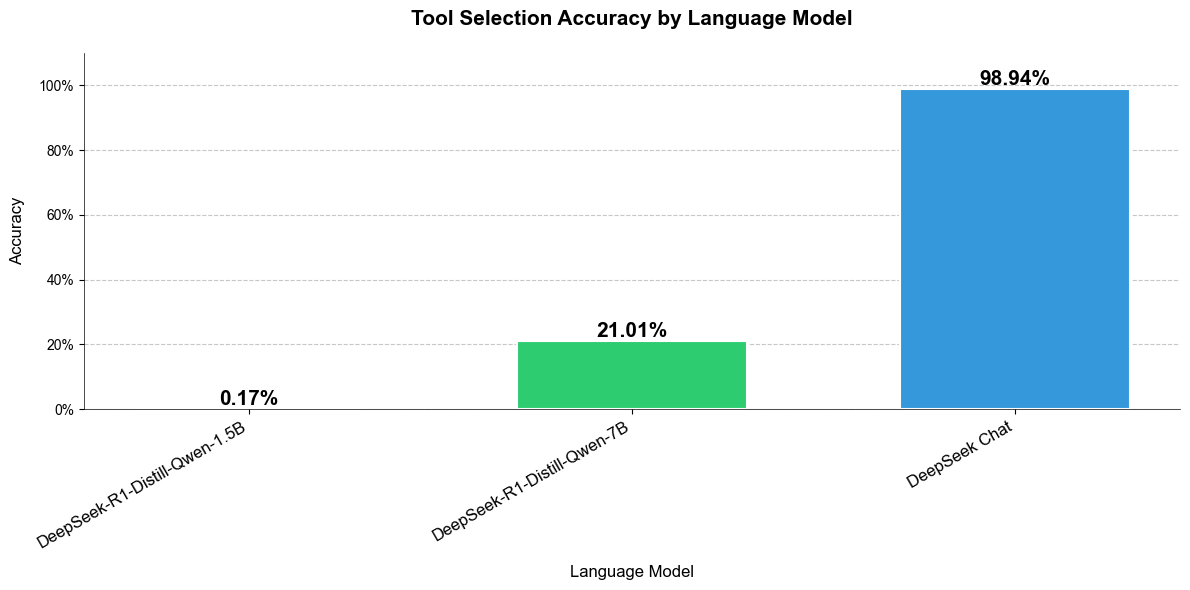

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate mean accuracy
mean_accuracy = result_data_df.groupby('llm_name')['tool_chosen_correctly'].mean().sort_values()

# Custom colors with higher saturation
colors = ['#3498db', '#2ecc71']  # Vibrant blue and green

# Create bars
bars = ax.bar(
    mean_accuracy.index,
    mean_accuracy.values,
    color=colors,
    width=0.6,
    edgecolor='white',
    linewidth=1.5
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.2%}',
        ha='center',
        va='bottom',
        fontsize=15,
        fontweight='bold'
    )

# Customize the plot
ax.set_title('Tool Selection Accuracy by Language Model', 
             pad=20, 
             fontsize=15, 
             fontweight='bold')
ax.set_xlabel('Language Model', fontsize=12, labelpad=10)
ax.set_ylabel('Accuracy', fontsize=12, labelpad=10)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set y-axis limits with some padding
ax.set_ylim(0, min(1.1, max(mean_accuracy.values) * 1.15))

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Rotate x-axis labels
ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig('tool_acc.png', dpi=1000)

## Precision/Recall

In [85]:
# Initialize a list to collect results
metrics = []

import itertools

# Get unique values for llm_name and correct_tool_name
llm_names = result_data_df['llm_name'].unique()
correct_tool_names = result_data_df['correct_tool_name'].unique()

# Use itertools.product to generate all combinations
all_combinations = list(itertools.product(llm_names, correct_tool_names))

# Now, iterate through combinations and get data for each
results = []

for llm_name, tool_name in all_combinations:
    group = result_data_df[result_data_df['llm_name'] == llm_name]

    # True Negatives: Tool was not chosen correctly
    true_negatives = len(group[(group['chosen_tool_name'] != tool_name) & (group['correct_tool_name'] != tool_name)])
    
    # True Positives: Tool was chosen correctly
    true_positives = len(group[(group['chosen_tool_name'] == tool_name) & (group['tool_chosen_correctly'] == True)])
    
    # False Positives: Tool was chosen incorrectly
    false_positives = len(group[(group['chosen_tool_name'] == tool_name) & (group['tool_chosen_correctly'] == False)])

    # False Negatives: Tool was correct but not chosen
    false_negatives = len(group[(group['chosen_tool_name'] != tool_name) & (group['correct_tool_name'] == tool_name)])

    # Calculate precision and recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    accuracy = (true_positives + true_negatives) / (true_negatives + true_positives + false_positives + false_negatives)

    # Append results to the list
    metrics.append({
        'llm_name': llm_name,
        'tool_name': tool_name,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    })

In [86]:
len(metrics)

15

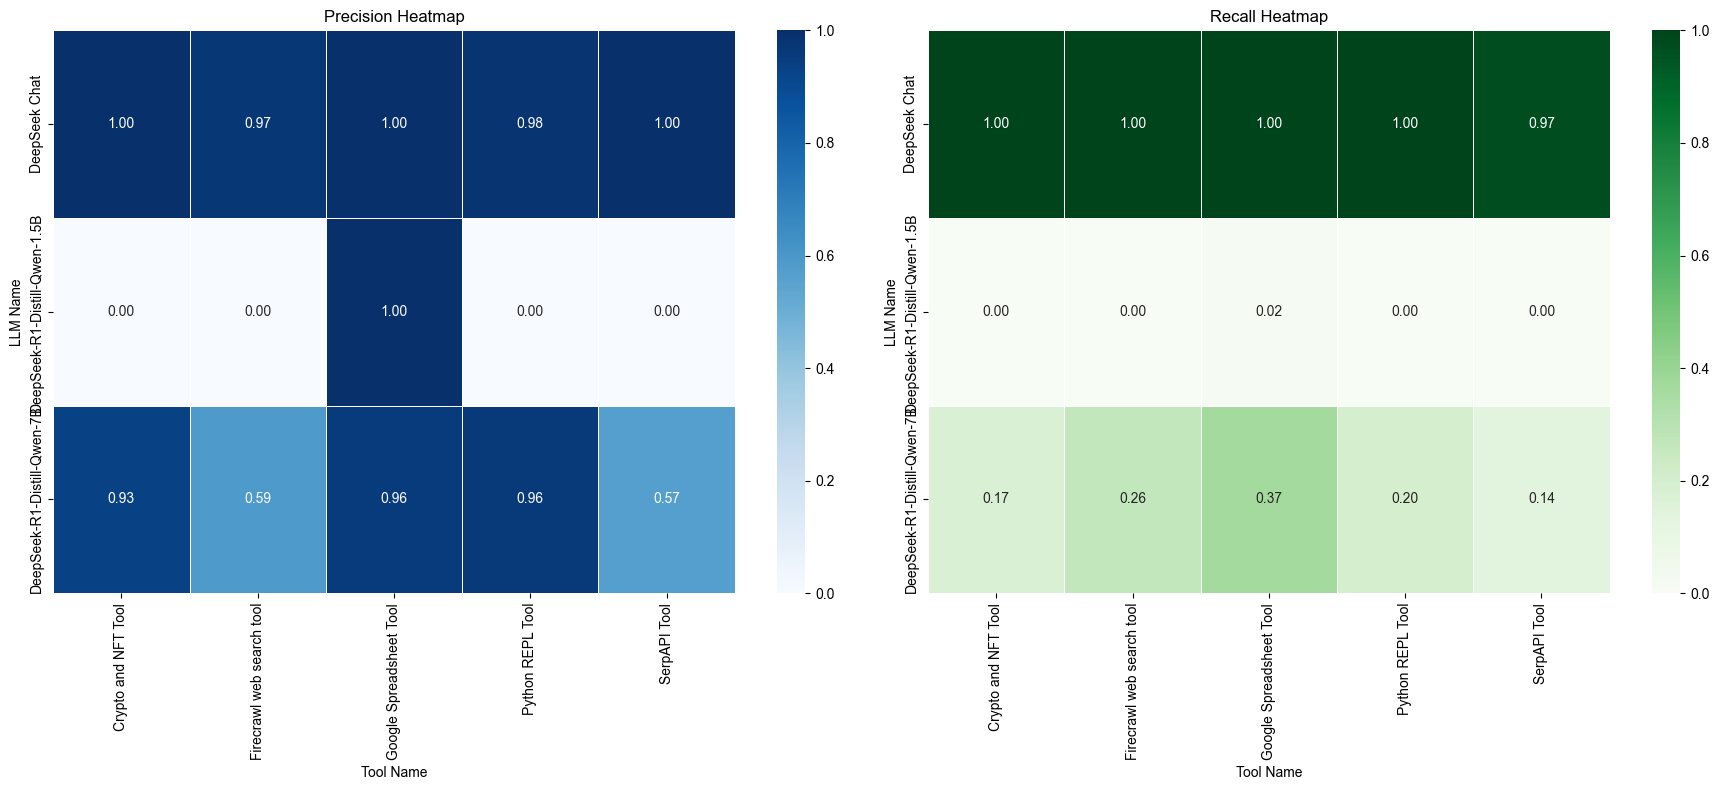

In [87]:
# Create a DataFrame from the results
metrics_df = pd.DataFrame(metrics)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame (metrics_df should already be defined)
metrics_df = pd.DataFrame(metrics)

# Aggregate by calculating the mean precision and recall for each (llm_name, tool_name) pair
metrics_df = metrics_df.groupby(['llm_name', 'tool_name']).mean().reset_index()

# Pivot the DataFrame for heatmaps
precision_pivot = metrics_df.pivot(index='llm_name', columns='tool_name', values='precision')
recall_pivot = metrics_df.pivot(index='llm_name', columns='tool_name', values='recall')

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Precision Heatmap
sns.heatmap(precision_pivot, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Precision Heatmap')
axes[0].set_xlabel('Tool Name')
axes[0].set_ylabel('LLM Name')

# Recall Heatmap
sns.heatmap(recall_pivot, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Recall Heatmap')
axes[1].set_xlabel('Tool Name')
axes[1].set_ylabel('LLM Name')

# Adjust layout
plt.tight_layout()
plt.savefig('p_r_tool.png', dpi=1000)
plt.show()

In [88]:
# Adding weights for each sample based on the number of samples per (llm_name, tool_name) pair

# Simulating a count column for weights (assuming a random sample size for demonstration)
import numpy as np

# Adding a random sample count for demonstration purposes
metrics_df['sample_count'] = np.random.randint(5, 20, size=len(metrics_df))

# Calculating weighted precision and recall
metrics_df['weighted_precision'] = metrics_df['precision'] * metrics_df['sample_count']
metrics_df['weighted_recall'] = metrics_df['recall'] * metrics_df['sample_count']

# Group by LLM name to aggregate and calculate the weighted averages
llm_weighted_metrics = metrics_df.groupby('llm_name').apply(
    lambda x: pd.Series({
        'weighted_precision': x['weighted_precision'].sum() / x['sample_count'].sum(),
        'weighted_recall': x['weighted_recall'].sum() / x['sample_count'].sum(),
    })
).reset_index()

# Melt the DataFrame for plotting
llm_weighted_melted = llm_weighted_metrics.melt(id_vars=['llm_name'], value_vars=['weighted_precision', 'weighted_recall'],
                                                var_name='Metric', value_name='Score')

# Calculate F1 score for each LLM based on weighted precision and recall
llm_weighted_metrics['f1_score'] = 2 * (
    llm_weighted_metrics['weighted_precision'] * llm_weighted_metrics['weighted_recall']
) / (llm_weighted_metrics['weighted_precision'] + llm_weighted_metrics['weighted_recall'])

# Sort by increasing F1 score
llm_weighted_metrics_sorted = llm_weighted_metrics.sort_values(by='f1_score').reset_index(drop=True)


/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/ipykernel_55559/3573547475.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  llm_weighted_metrics = metrics_df.groupby('llm_name').apply(


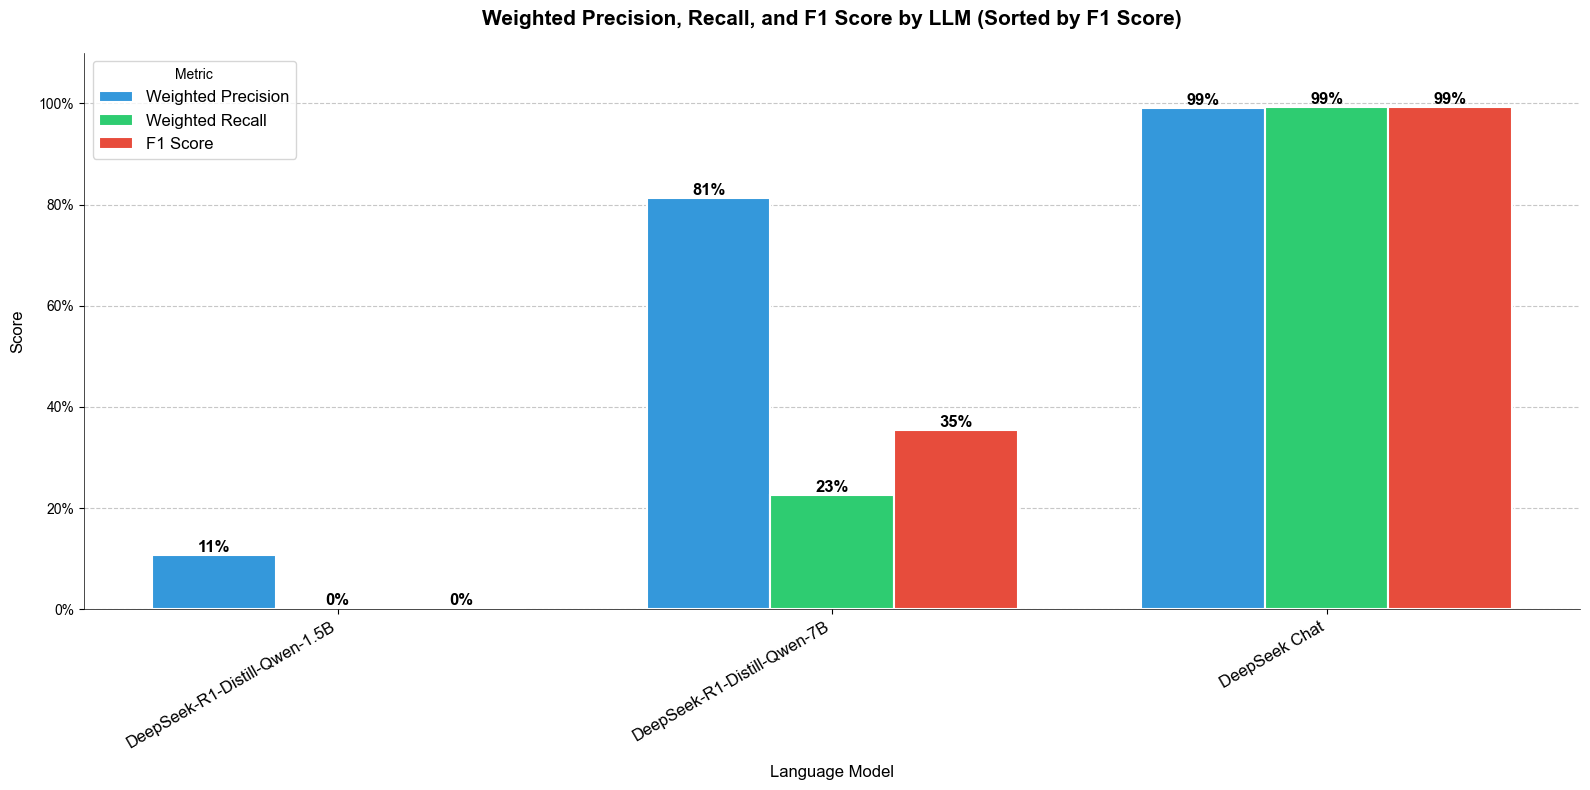

In [89]:
# Increase spacing between groups by adjusting the bar width and x locations
fig, ax = plt.subplots(figsize=(16, 8))

# Define bar width and spacing
bar_width = .2
spacing = 0.2
x = np.arange(len(llm_weighted_metrics_sorted['llm_name'])) * (bar_width * 3 + spacing)

# Create bars with increased space between groups
bars_precision = ax.bar(
    x - bar_width, llm_weighted_metrics_sorted['weighted_precision'],
    color='#3498db', width=bar_width, edgecolor='white', linewidth=1.5, label='Weighted Precision'
)

bars_recall = ax.bar(
    x, llm_weighted_metrics_sorted['weighted_recall'],
    color='#2ecc71', width=bar_width, edgecolor='white', linewidth=1.5, label='Weighted Recall'
)

bars_f1 = ax.bar(
    x + bar_width, llm_weighted_metrics_sorted['f1_score'],
    color='#e74c3c', width=bar_width, edgecolor='white', linewidth=1.5, label='F1 Score'
)

# Add value labels on top of each bar
for bars in [bars_precision, bars_recall, bars_f1]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{height:.0%}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

# Customize the plot
ax.set_title('Weighted Precision, Recall, and F1 Score by LLM (Sorted by F1 Score)', 
             pad=20, fontsize=15, fontweight='bold')
ax.set_xlabel('Language Model', fontsize=12, labelpad=10)
ax.set_ylabel('Score', fontsize=12, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(llm_weighted_metrics_sorted['llm_name'], rotation=30, ha='right', fontsize=12)

# Customize grid and spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set y-axis limits with padding
ax.set_ylim(0, 1.1)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add legend
ax.legend(title='Metric', fontsize=12)

# Adjust layout with more space
plt.tight_layout()
plt.show()


# Positional Bias

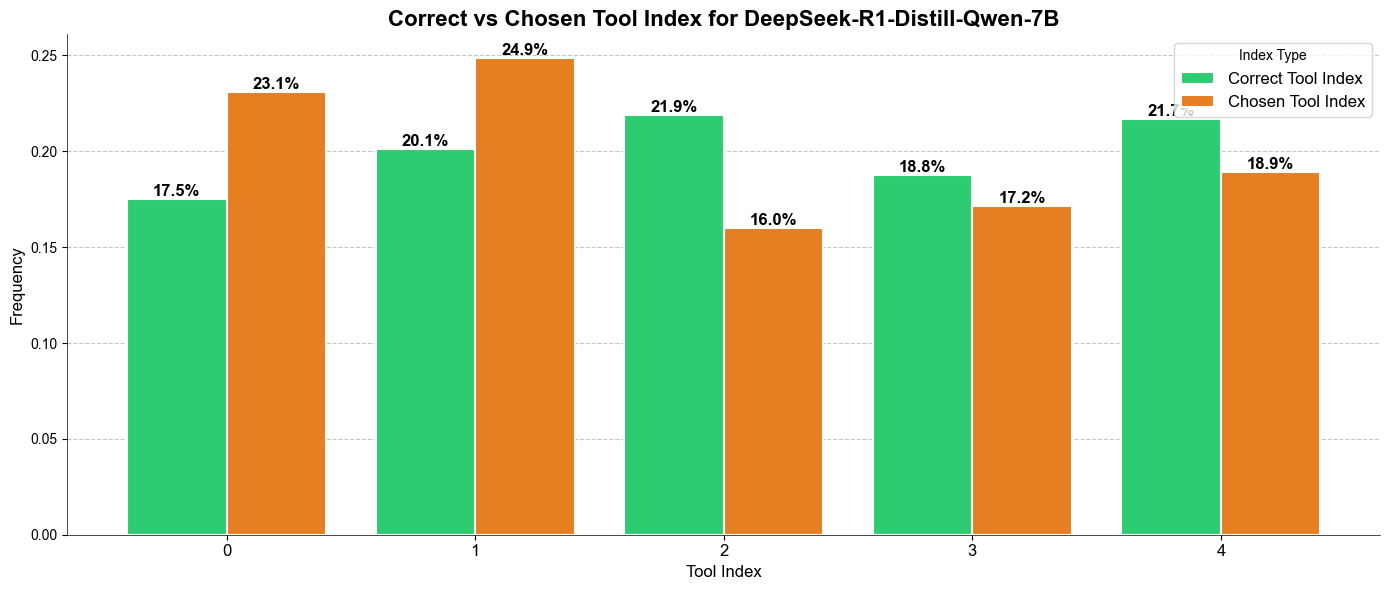

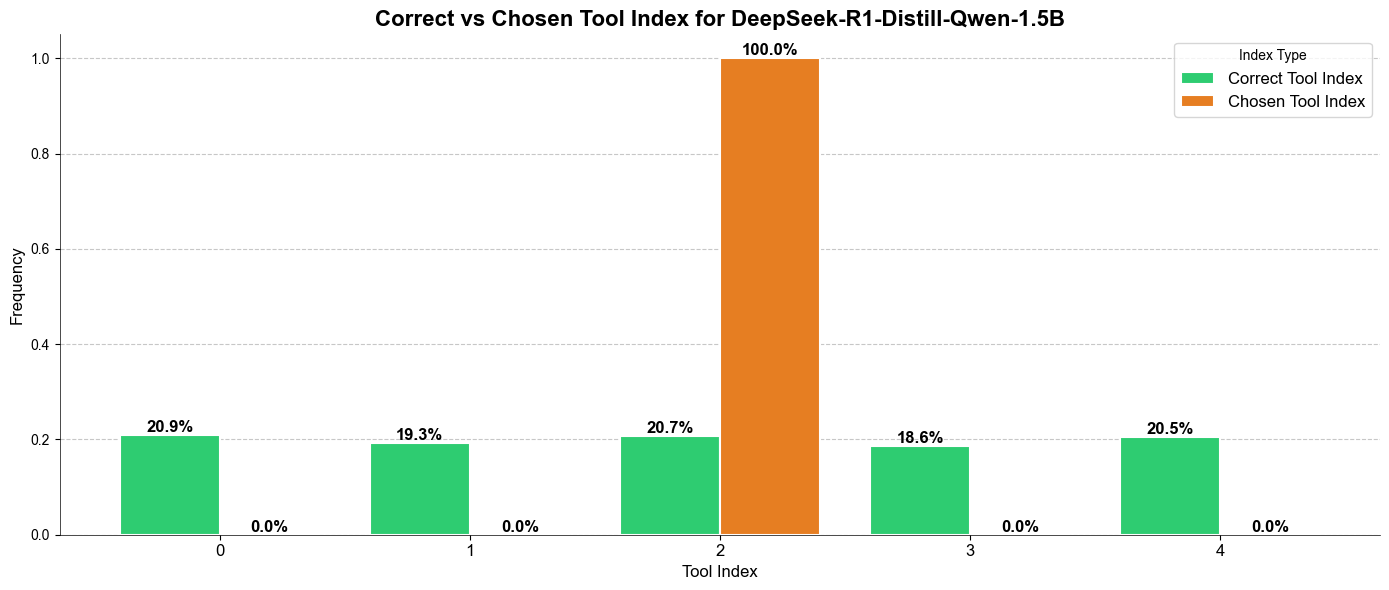

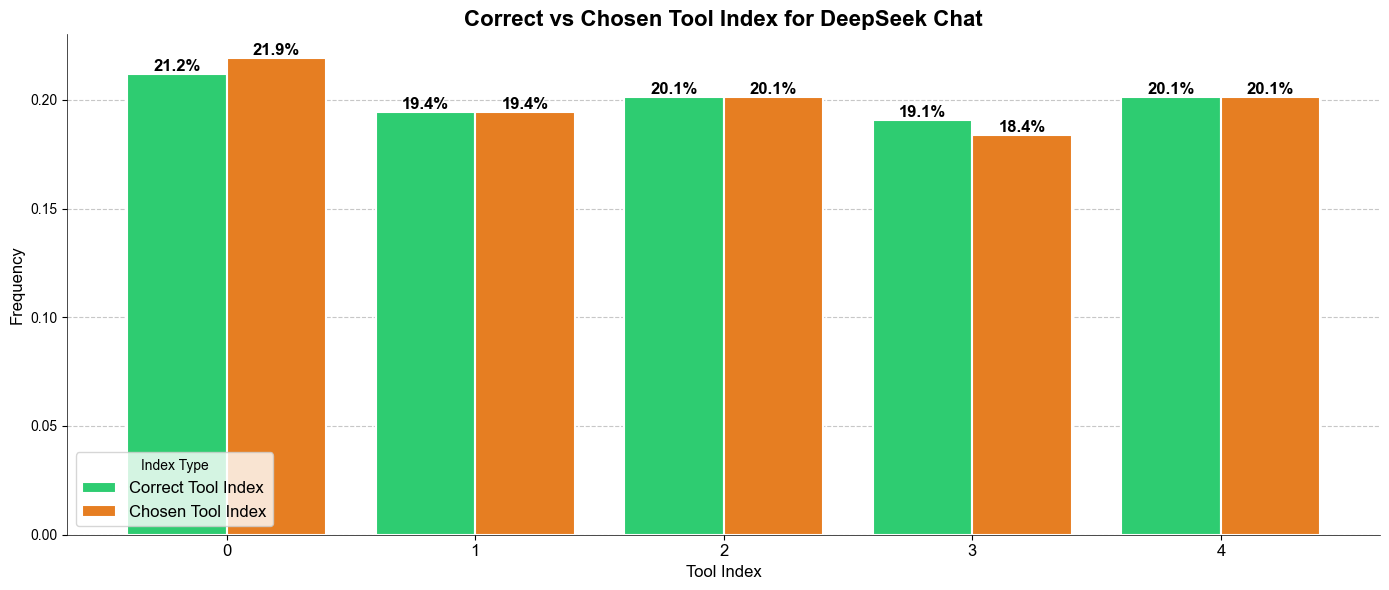

In [90]:
import matplotlib.pyplot as plt
model_choices = {}

# Define the model name
for MODEL_NAME in result_data_df['llm_name'].unique():
    
    # Filter the results for the specified model
    llm_results = result_data_df[result_data_df['llm_name'] == MODEL_NAME]
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Define bar width and x-axis locations
    bar_width = 0.4
    x = np.arange(len(llm_results['correct_tool_index'].unique()) )
    
    # Aggregate the data for plotting
    correct_counts = llm_results['correct_tool_index'].value_counts(normalize=True).sort_index()
    chosen_counts = llm_results['chosen_tool_index'].value_counts(normalize=True).sort_index()
    
    # Align indices
    correct_counts = correct_counts.reindex(x, fill_value=0)
    chosen_counts = chosen_counts.reindex(x, fill_value=0)

    model_choices[MODEL_NAME] = ((chosen_counts - correct_counts) / correct_counts)
    
    # Plot side-by-side bars with new colors
    bars_correct = ax.bar(
        x - bar_width / 2, correct_counts, width=bar_width, color='#2ecc71', edgecolor='white', linewidth=1.5, label='Correct Tool Index'
    )
    
    bars_chosen = ax.bar(
        x + bar_width / 2, chosen_counts, width=bar_width, color='#e67e22', edgecolor='white', linewidth=1.5, label='Chosen Tool Index'
    )
    
    # Add value labels on top of each bar
    for bars in [bars_correct, bars_chosen]:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2.,
                height,
                f'{round(height * 100, 1)}%',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold'
            )
    
    # Customize the plot
    ax.set_title(f'Correct vs Chosen Tool Index for {MODEL_NAME}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Tool Index', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=12)
    
    # Customize grid and spines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Add legend
    ax.legend(title='Index Type', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [91]:
def plot_pos_bias(proportion_data, title):  # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Define colors based on positive/negative values
    colors = ['#2ecc71' if val >= 0 else '#e74c3c' for val in proportion_data]
    
    # Plot bar chart
    bars = ax.bar(proportion_data.index, proportion_data.values, color=colors, edgecolor='white', linewidth=1.5)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{height:.2%}',
            ha='center',
            va='bottom' if height >= 0 else 'top',
            fontsize=12,
            fontweight='bold',
            color='black'
        )
    
    # Customize the plot
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Correct Tool Index', fontsize=12)
    ax.set_ylabel('Average Proportion (Chosen - Correct / Correct)', fontsize=12)
    
    # Customize grid and spines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Set y-axis limits for better visualization
    ax.set_ylim(min(proportion_data.values) - 0.05, max(proportion_data.values) + 0.05)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'pos_bias_tool_{title}.png', dpi=1000)
    plt.show()


## Average of all models

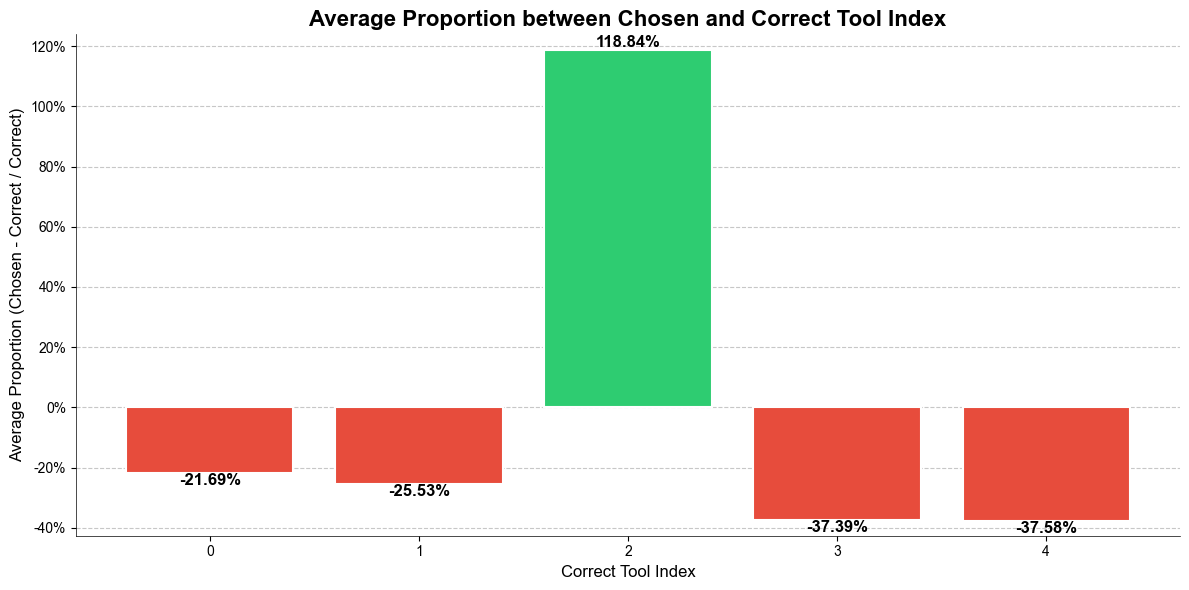

In [92]:
# Assuming model_choices is your list of Series
proportion_data = pd.concat([v for k, v in model_choices.items()], axis=1).mean(axis=1)
plot_pos_bias(proportion_data, 'Average Proportion between Chosen and Correct Tool Index')

In [98]:
model_choices.keys()

dict_keys(['DeepSeek-R1-Distill-Qwen-7B', 'DeepSeek-R1-Distill-Qwen-1.5B', 'DeepSeek Chat'])

## Closed Source Chat Bias

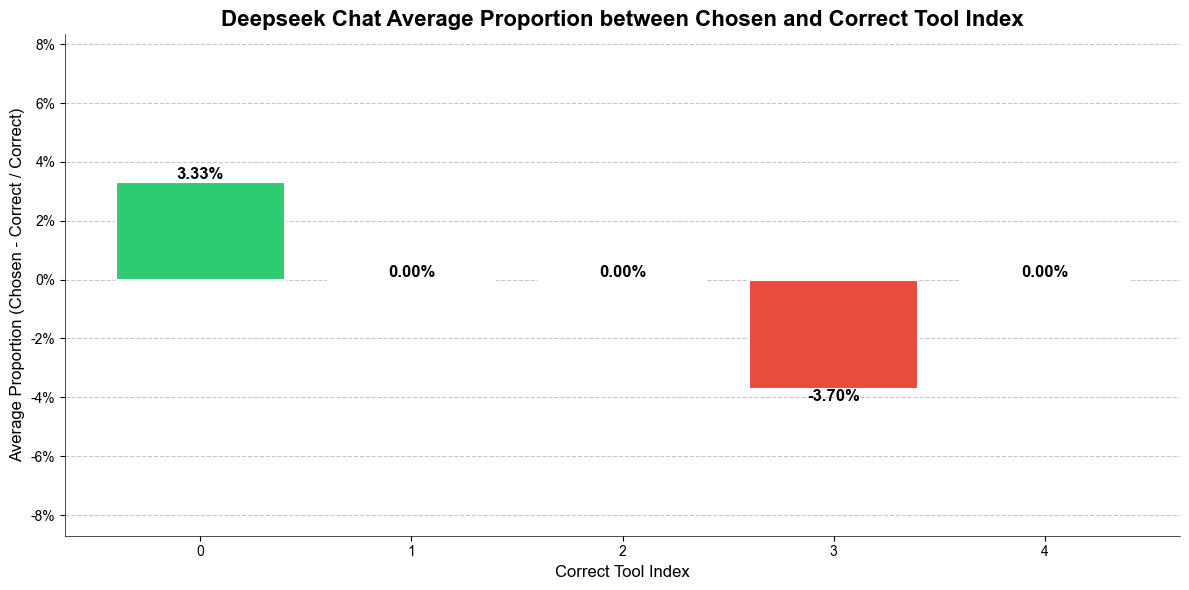

In [100]:
# Assuming model_choices is your list of Series
proportion_data = pd.concat([v for k, v in model_choices.items() if 'Chat' in k], axis=1).mean(axis=1)
plot_pos_bias(proportion_data, 'Deepseek Chat Average Proportion between Chosen and Correct Tool Index')

## Open-Source Bias

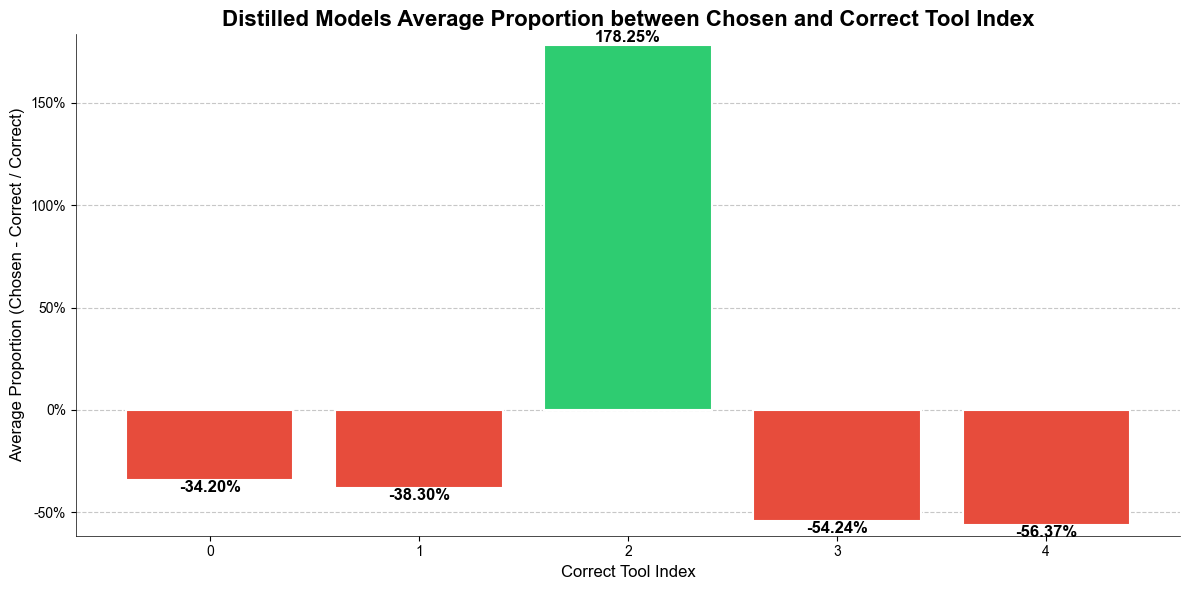

In [101]:
# Assuming model_choices is your list of Series
proportion_data = pd.concat([v for k, v in model_choices.items() if 'Dis' in k], axis=1).mean(axis=1)
plot_pos_bias(proportion_data, 'Distilled Models Average Proportion between Chosen and Correct Tool Index')